In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("index2018.csv")

In [60]:
df.head()

,date,spx,dax,ftse,nikkei,norm
0,07/01/1994,469.90,2224.95,3445.98,18124.01,NaN
1,10/01/1994,475.27,2225.00,3440.58,18443.44,NaN
2,11/01/1994,474.13,2228.10,3413.77,18485.25,NaN
3,12/01/1994,474.17,2182.06,3372.02,18793.88,NaN
4,13/01/1994,472.47,2142.37,3360.01,18577.26,NaN


In [4]:
df['date'].dtypes

dtype('O')

In [9]:
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

<AxesSubplot:title={'center':'S&P500 Prices'}>

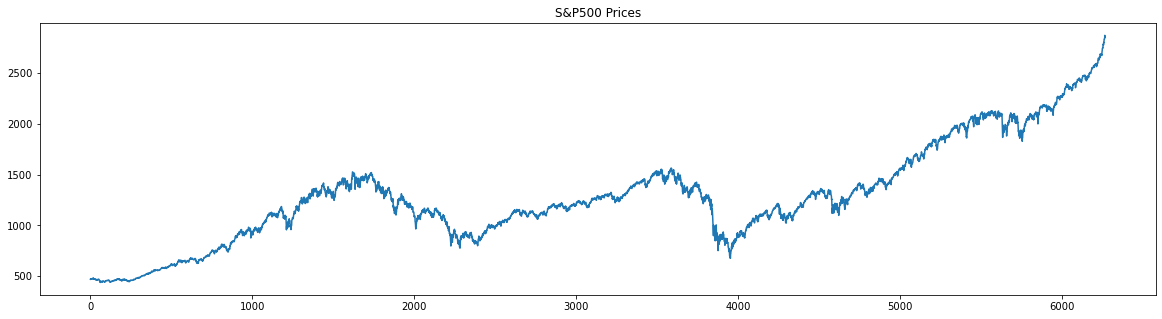

In [13]:
import matplotlib.pyplot as plt                    #time is in 1-6000(the index of time), we will correct this
df.spx.plot(figsize=(20,5),title=("S&P500 Prices"))

<AxesSubplot:title={'center':'FTSE Price'}>

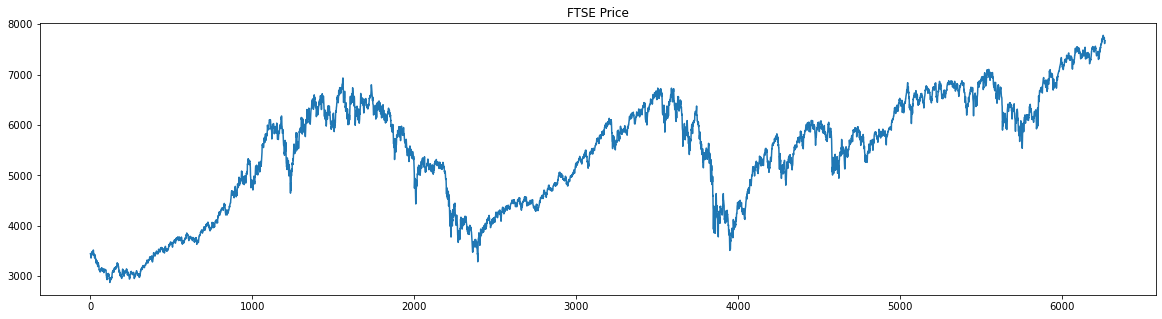

In [17]:
df.ftse.plot(figsize=(20,5),title=("FTSE Price"))

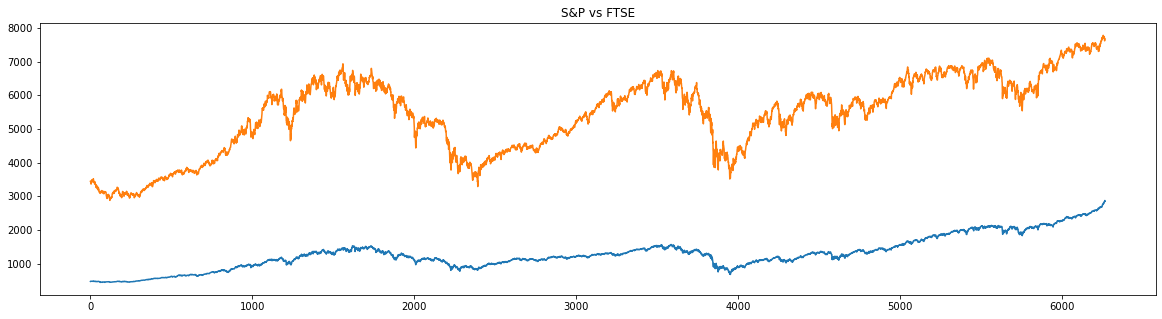

In [18]:
df.spx.plot(figsize=(20,5),title=("S&P500 Prices"))      #ftse values are greater than s&p, 
df.ftse.plot(figsize=(20,5),title=("FTSE Price"))      # S&P values does not seem to change that much in this graph
plt.title("S&P vs FTSE")                    #(this is misleading), in independent graph we saw it was 
plt.show()                                 #changing, it looks that way coz ftse changes by a lot compared to s&p


# The QQ Plot

In [24]:
import scipy.stats
import pylab

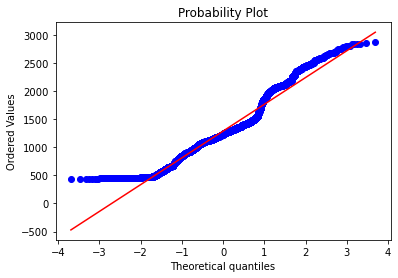

In [26]:
scipy.stats.probplot(df.spx,plot=pylab)        #takes the values and arranges in order , (x show the )
pylab.show()                              # the red line shows a normally distributed data line. 
 #we see data is not normally distributed       #we can see that the blue line at 500 show 
                                               #points which has std deviation of (ranging from -1 to -4)

# FROM TEXT TO DATA

In [6]:
df.date.describe()                      #cant describe date, just random values is shown

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [8]:
df.date = pd.to_datetime(df.date,dayfirst = True)

In [9]:
df

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.900000,2224.95,3445.980000,18124.01
1,1994-01-10,475.270000,2225.00,3440.580000,18443.44
2,1994-01-11,474.130000,2228.10,3413.770000,18485.25
3,1994-01-12,474.170000,2182.06,3372.020000,18793.88
4,1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,2018-01-23,2839.130362,13559.60,7731.827774,24124.15
6265,2018-01-24,2837.544008,13414.74,7643.428966,23940.78
6266,2018-01-25,2839.253031,13298.36,7615.839954,23669.49
6267,2018-01-26,2872.867839,13340.17,7665.541292,23631.88


In [11]:
df.date.describe()              #we also hv hour data, see if we can use it to set it in this date-time column

/tmp/ipykernel_3316/1371252037.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

# Setting time as index

In [12]:
df.set_index("date",inplace =True)      #we saw that all data in time are unique so no clash in setting it as index

In [14]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Setting the desired Frequency

In [16]:
df = df.asfreq('d')    #we see frequency is set for daily, thats why new dates are created (but have no values)
df.head()                  # we will see how to take care of this nan values in these new dates

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [17]:
#when only analysis of business days are required , we remove weekends

df = df.asfreq('b')              #only business days are shown
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Splitting Data

In [18]:
#in time-series data we can't shuffle the data since timeseries data has to be in chronological order

In [ ]:
# 80-20 Split

In [22]:
size=int(len(df)*0.8)
size

5021

In [24]:
train= df.iloc[:size]
train.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [25]:
test= df.iloc[size:]
test.head()

,spx,dax,ftse,nikkei
date,,,,
2013-04-08,1563.071269,7662.64,6276.94,13192.59
2013-04-09,1568.607909,7637.51,6313.20,13192.35
2013-04-10,1587.731827,7810.63,6387.37,13288.13
2013-04-11,1593.369863,7871.63,6416.14,13549.16
2013-04-12,1588.854623,7744.77,6384.39,13485.14


# White Noise

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [6]:
#loading and transforming data
data = pd.read_csv("index2018.csv")
ds= data.copy()
ds.date= pd.to_datetime(ds.date,dayfirst=True)
ds.set_index("date",inplace=True)
ds=ds.asfreq('b')
ds= ds.fillna(method='ffill')

In [7]:
ds.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [10]:
# removing surplus data
ds['market_value']=ds.spx

In [13]:
del ds['spx']
del ds['dax']
del ds['ftse']
del ds['nikkei']
size = int(len(ds)*0.8)
ds_train, ds_test = ds.iloc[:size], ds.iloc[size:]

In [14]:
wn= np.random.normal(loc= ds.market_value.mean(),scale=ds.market_value.std(),size=len(ds))
#loc takes nos for avg point of distribution, scale indicates how wide distribution is. size should be same as
#ds.maketvlaue for ds

In [16]:
ds['wn']=wn

In [17]:
ds.describe()

,market_value,wn
count,6277.000000,6277.000000
mean,1288.642547,1286.672756
std,487.868210,487.602751
min,438.920000,-862.895270
25%,992.715221,961.956235
50%,1233.761241,1283.914015
75%,1460.250000,1617.773145
max,2872.867839,3157.460837


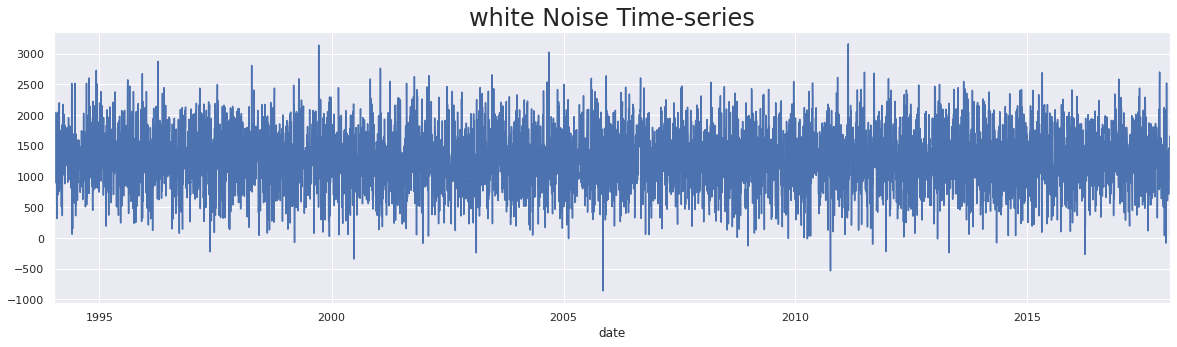

In [18]:
ds.wn.plot(figsize = (20,5))
plt.title("white Noise Time-series", size= 24)
plt.show()

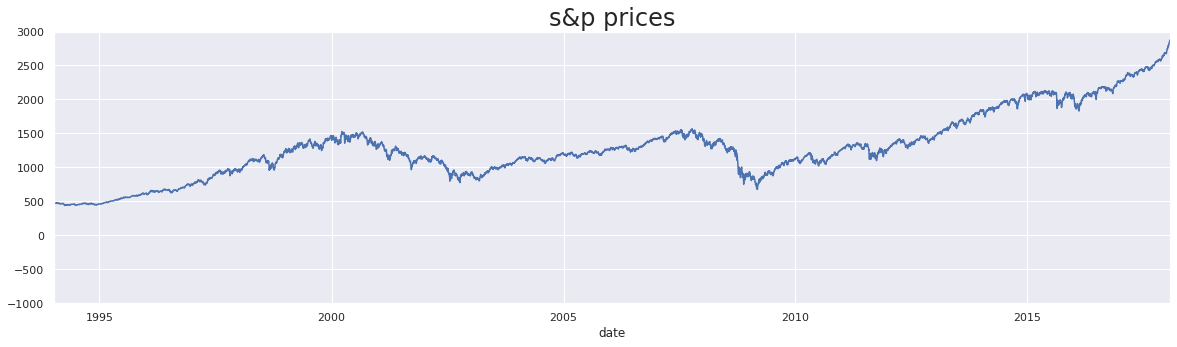

In [19]:
#comparing wn to s&p 

ds.market_value.plot(figsize=(20,5))
plt.title("s&p prices",size=24)
plt.ylim(-1000,3000)        #set y for comparison with s&p
plt.show()

# Random Walk

In [47]:
rw = pd.read_csv("025 RandWalk.csv")
rw.date= pd.to_datetime(rw.date,dayfirst=True)
rw.set_index("date",inplace=True)
rw=rw.asfreq('b')
rw= rw.fillna(method='ffill')

In [48]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [49]:
ds['rw']= rw.price

In [59]:
ds=ds[:5021]
ds

,market_value,wn,rw
date,,,
1994-01-07,469.900000,800.938914,1122.139662
1994-01-10,475.270000,1143.263849,1080.347860
1994-01-11,474.130000,1770.309296,1082.095245
1994-01-12,474.170000,1590.181043,1083.639265
1994-01-13,472.470000,1042.425276,1067.146255
...,...,...,...
2013-04-01,1562.173837,890.436544,2263.675474
2013-04-02,1570.252238,2092.973144,2225.000870
2013-04-03,1553.686978,1104.914379,2190.787688


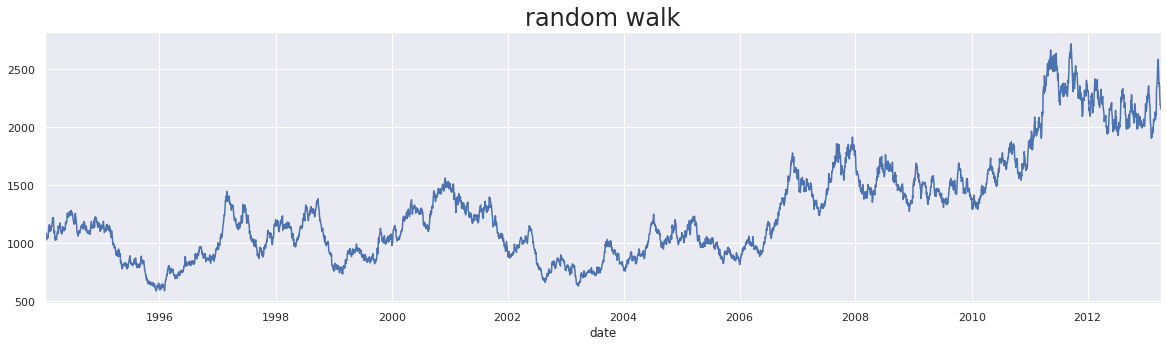

In [60]:
ds.rw.plot(figsize = (20,5))
plt.title("random walk",size=24)
plt.show()

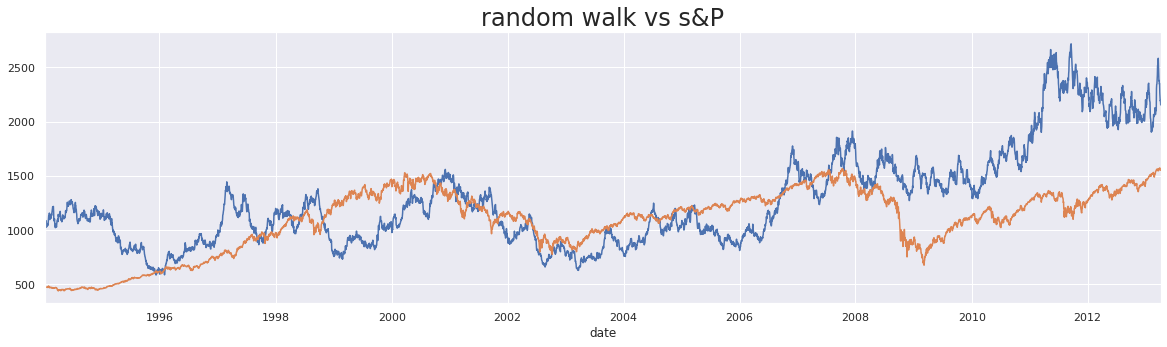

In [61]:
ds.rw.plot(figsize = (20,5))
ds.market_value.plot()
plt.title("random walk vs s&P",size=24)
plt.show()

- both have small variations bw consecutive period of time
- both have cyclical increases and decreases in short periods of time.

# Stationarity

# Dicky Fuller Test to find stationarity

It  assumes that the null hypothesis is Non-Stationarity, H0=Non-stationary(assumes one lag autocorr coeff is < 1)
H1 = stationarity (assumes one lag autocorr coeff is = 1)

if test statistics < critical value, reject null. so data is stationary

In [34]:
sts.adfuller(ds.market_value)

(1.1194986381728402,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.209867750025)

In [ ]:
(1.1194986381728402, ----test statiscs
 0.9953796476080692, -----p value
 10,--the no of lags used in regression when determining the t-statistics,so we have autocorr going back 10 periods
 6266, --- no of observations
 {'1%': -3.4313940441948807,  ]
  '5%': -2.8620013751563964,  ] -------critical values at 1%, 5% and 10%
  '10%': -2.567015587023998}, ]
 50258.209867750025) ---- maximized information criteria, lower the value, easier to make predictions


t-statistics is greater than each critical values, so for all these level of significance,
we did not find any evidence for stationarity.

p value is 0.99, 99% chance null will not be rejected. so this is non-stationary



In [35]:
#trying for white noise , we know white noise is stationary

sts.adfuller(ds.wn)           # p-value =0 , means stationary, no correlation (exactly what we expected)

(-77.79993598371779,
 0.0,
 0,
 6276,
 {'1%': -3.4313923799633836,
  '5%': -2.862000639842268,
  '10%': -2.567015195598801},
 94986.39135592183)

In [62]:
sts.adfuller(ds.rw)        #p value =61% chance it is non-stationary

(-1.328607392768973,
 0.6159849181617378,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

The covariance of two intervals with similar size would rarely be equal, 
so we expect random walk to be non-stationary

In [ ]:
Testing for seasonality

- BY Decomposing

We split data into 3 effects:
    trend ---------- Pattern
    seasonality----- Cyclical Effects
    residual-------- Error of prediction
    

In [ ]:
simplest type of decomposition is "Naive Decomposition"

Naive Decomposition - expects linear relation between the three splits(trend,seasonality and residual) and 
the observed time series

Naive Decomposition types:-
    Additive = trend + seasonality + residual
    Multiplicative = trend * seasonality * residual
    

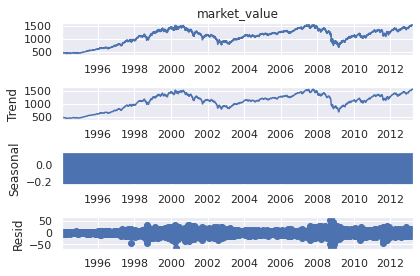

In [76]:
seas_add= seasonal_decompose(ds.market_value,model="additive")
seas_add.plot()
plt.show()

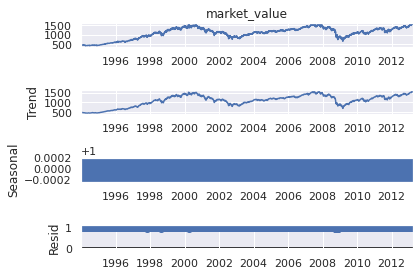

In [77]:
seas_mult= seasonal_decompose(ds.market_value,model="multiplicative")
seas_mult.plot()
plt.show()

1st graph shows observed trend from out dataset, which shows how past data affects future data,
This is used to predict the 2nd graph which shows trend formed from predicted data
3rd graph shows a rectangular bar , which shows there is no evidence of any cyclic pattern
residual shows the error between the predicted points. (we can see in additive at 2000 and 2008 pridictions had 
                                                        error due to the .com bubble and the recession)

In [ ]:
sgt.plot_acf(ds.market_value,lags=40,zero= False)    #lags =40 means till 40 lags from the current data 
                                                    #(40 is optimum value used for time series analysis)
     # zero = false , we dont check correlation current data with itself as corr of itself

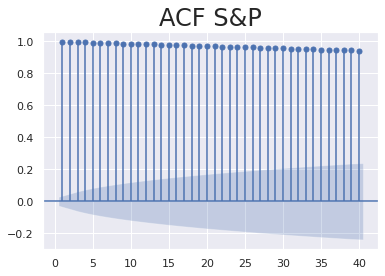

In [78]:
sgt.plot_acf(ds.market_value,lags=40,zero= False)
plt.title("ACF S&P",size = 24)
plt.show()    

The bluish shaded portion shows the significance values. 
All the lags show a value greater than the significance values.

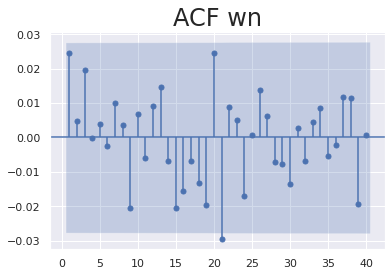

In [81]:
sgt.plot_acf(ds.wn,lags=40,zero= False)     #there are no value greater than significance values , 
plt.title("ACF wn",size = 24)           #  so no autocorrelation for any lag i.e. no lag serves as decent estimator
plt.show()    

# PACF

Autocorrelation-

feature X, X (at t1), X (at t2) and X (at t3) affects X (at t4) , this is the direct relation

X (at t1) and X (at t2) affects X (at t3). And now this X (at t3) affects X (at t4), 
then this is called indirect relation.

If we wish to determine only the direct relation between the time series and its lagged version, 
we need Partial Autocorrelation function (PACF)

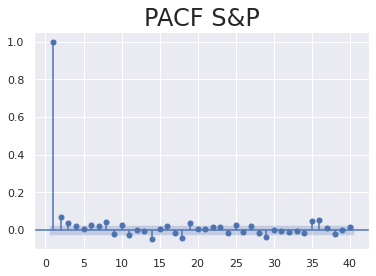

In [83]:
sgt.plot_pacf(ds.market_value, lags = 40, zero = False, method =  ('ols'))
plt.title("PACF S&P", size= 24)
plt.show()

PACF only shows direct effect of the lags 1-40
while ACF show direct and indirect effect of 1-40 lags

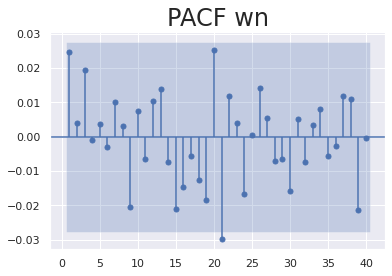

In [84]:
#checking PACF of white noise, i.e. no autocorrelation

sgt.plot_pacf(ds.wn, lags = 40, zero = False, method =  ('ols'))
plt.title("PACF wn", size= 24)
plt.show()

# AutoRegressive Model

ex- for 2 lags  (AutoRegression 2)

   X (at t) = C + Phi1*x(at t-1) + Phi2*x(at t-2) + E(at t)
   
   More lags > more complication > more coefficients > more likely NOT Significant

More data means better prediction but if the coefficients(phi) are not significantly different from zero, they  will have no effect on predicted values

In [ ]:
ACF and PACF of prices

In [18]:
data = pd.read_csv("index2018.csv")
ds= data.copy()
ds.date= pd.to_datetime(ds.date,dayfirst=True)
ds.set_index("date",inplace=True)
ds=ds.asfreq('b')
ds= ds.fillna(method='ffill')

In [16]:
del ds['spx']
del ds['dax']
del ds['ftse']
del ds['nikkei']
size = int(len(ds)*0.8)
ds_train, ds_test = ds.iloc[:size], ds.iloc[size:]

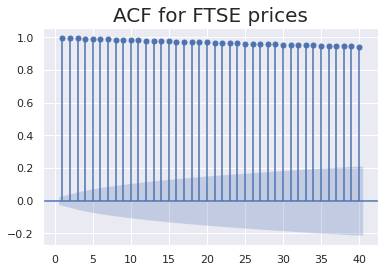

In [19]:
sgt.plot_acf(ds.ftse, zero =False, lags = 40)      #comparing it with ACF of S&P , bith are similar
plt.title("ACF for FTSE prices",size = 20)
plt.show()

PACF OF FTSE vvvv

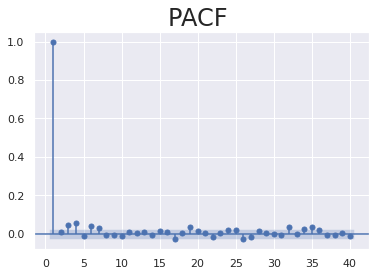

In [21]:
sgt.plot_pacf(ds.ftse, lags = 40, zero = False, method =  ('ols'))
plt.title("PACF ", size= 24)
plt.show()

Business days are 22 days in month and we see cyclic changes every month. so we will remove all lags above 22.

We see most values till a month ago are negatively affecting values presently.
very less lags are affecting posively at start so we will not over analyse there effect

We see 1st lag is greatly significant so we will include it in model

 ### FITTING AR(1) MODEL for FTSE Prices
  
  fitting time series into a simple auto regression model

In [13]:
from statsmodels.tsa.arima_model import ARMA

In [37]:
model_ar = ARMA(ds.ftse, order=(1,0))  #order (1,..)--> 1 denotes no of past values we wish to use in model
                                       #order (..,0) --> 0 denoted that the residual is not included in model
# X (at t) = C + Phi*x (at t-1) + E (at t) ---> E is taken zero since order is (..., 0)

In [25]:
results_ar= model_ar.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48644D+00    |proj g|=  2.58105D-04

At iterate    5    f=  5.48640D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     13      1     0     0   0.000D+00   5.486D+00
  F =   5.4864015527189745     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [26]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(1, 0)   Log Likelihood              -34438.143
Method:                       css-mle   S.D. of innovations             58.379
Date:                Wed, 29 Jun 2022   AIC                          68882.285
Time:                        10:22:20   BIC                          68902.519
Sample:                    01-07-1994   HQIC                         68889.296
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5865.1599    935.072      6.272      0.000    4032.452    7697.868
ar.L1.ftse     0.9991      0.001   1453.235      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
-----------------------------------------------------------------------------
"""

#### X (at t) = C + Phi*x (at t-1) + E (at t)  #see video Auto Regressive AR Model 12:00
    
    
##### So C is (const,coef) - 5865.1599
 ###### phi is (ar.L1.ftse,coef) - 0.9991 (we see phi1 is approx 1 which we saw in acf and pacf of ftse as well.)
##### p value 0 for both const and phi1 denote that there values are significantly diff from 0. 
##### so we will take them into account

In [12]:
import warnings
warnings.filterwarnings('ignore')

# Auto Regressive mode for n order (Higher lag AR Model)

In [35]:
model_ar2 = ARMA(ds.ftse, order=(2,0))
results_ar2= model_ar2.fit()
results_ar2.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48642D+00    |proj g|=  2.84928D-04

At iterate    5    f=  5.48637D+00    |proj g|=  7.19425D-06
  ys=-1.149E-11  -gs= 2.326E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     29      1     1     0   2.665D-07   5.486D+00
  F =   5.4863742603962198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(2, 0)   Log Likelihood              -34437.971
Method:                       css-mle   S.D. of innovations             58.377
Date:                Wed, 29 Jun 2022   AIC                          68883.942
Time:                        10:50:14   BIC                          68910.921
Sample:                    01-07-1994   HQIC                         68893.290
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5947.3281   1108.253      5.366      0.000    3775.192    8119.464
ar.L1.ftse     0.9905      0.013     78.994      0.000       0.966       1.015
ar.L2.ftse     0.0087      0.013      0.693      0.489      -0.016       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           +0.0000j            1.0008            0.0000
AR.2         -114.9920           +0.0000j          114.9920            0.5000
-----------------------------------------------------------------------------
"""

#### ar.L2.ftse has p value of coeff is smaller than 0.5 , it is significantly diff from 0.


In [36]:
model_ar3 = ARMA(ds.ftse, order=(3,0))
results_ar3= model_ar3.fit()
results_ar3.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48532D+00    |proj g|=  7.58238D-04

At iterate    5    f=  5.48530D+00    |proj g|=  1.90612D-03

At iterate   10    f=  5.48526D+00    |proj g|=  1.36779D-05

At iterate   15    f=  5.48526D+00    |proj g|=  2.66454D-07

At iterate   20    f=  5.48526D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     38      1     0     0   1.776D-07   5.485D+00
  F =   5.4852597842622188     

CONVERG

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(3, 0)   Log Likelihood              -34430.976
Method:                       css-mle   S.D. of innovations             58.312
Date:                Wed, 29 Jun 2022   AIC                          68871.951
Time:                        10:50:21   BIC                          68905.675
Sample:                    01-07-1994   HQIC                         68883.636
                         - 01-29-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5948.6663   1153.853      5.155      0.000    3687.157    8210.176
ar.L1.ftse     0.9901      0.012     79.221      0.000       0.966       1.015
ar.L2.ftse    -0.0380      0.018     -2.153      0.031      -0.073      -0.003
ar.L3.ftse     0.0472      0.013      3.742      0.000       0.022       0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           -0.0000j            1.0007           -0.0000
AR.2           -0.0974           -4.6002j            4.6012           -0.2534
AR.3           -0.0974           +4.6002j            4.6012            0.2534
-----------------------------------------------------------------------------
"""

In [ ]:
We prefer models with higher log-likelyhood and lower information criteria
ex- AR3 MODEL Log Likelihood	-34430.976, AIC	68871.951, BIC	68905.675, HQIC	68883.636

    AR2 MODEL Log Likelihood	-34437.971, AIC	68883.942, BIC	68910.921, HQIC	68893.290
    
    AR3 has greater LL and lower information criteria(AIC,BIC,HQIC), so we prefer AR3

In [ ]:
for i in range lags:
    model_ar3 = ARMA(ds.ftse, order=(3,0))
    results_ar3= model_ar3.fit()
    results_ar3.summary()

## LLR TEST 

In [15]:
from scipy.stats.distributions import chi2
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf         #llf returns log likelihood ratio of model
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))             
    p = chi2.sf(LR,DF).round(3)  #use chi sqr to find p value if diff in log likelihood is significant
    return p

In [89]:
LLR_test(model_ar2,model_ar3)  #if p values < 0.05 ==> diff in log likelyhood is significant
                               #so opt for more complicated model , go for AR2 and so on

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48642D+00    |proj g|=  2.84928D-04

At iterate    5    f=  5.48637D+00    |proj g|=  7.19425D-06
  ys=-1.149E-11  -gs= 2.326E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     29      1     1     0   2.665D-07   5.486D+00
  F =   5.4863742603962198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48532D+00    |proj g|=  7.58238D-04

At iterate    5    f=  5.48530D+00    |proj g|=  1.90612D-03

At iterate   10    f=  5.48526D+00    |proj g|=  1.36779D-05

At iterate   15    f=  5.48526D+00    |proj g|=  2.66454D-07

At iterate   20    f=  5.48526D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     38      1     0     0   1.776D-07   5.485D+00
  F =   5.4852597842622188     

CONVERG

0.0

In [ ]:
#Automating the steps

In [118]:
def compmod(lags):
    models=[("mod_"+str(i+1)) for i in range(lags)]
    result=[("results_ar"+str(i+1)) for i in range(lags)]
    for i in range(lags):  
        models[i] = ARMA(ds.ftse, order=(i+1,0))
        result[i] = models[i].fit()
        print(result[i].summary())
    for i in range(lags-1):
         print(f"COMP model{i+1} and model{i+2}",LLR_test(models[i],models[i+1]))

In [119]:
print(compmod(8))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48644D+00    |proj g|=  2.58105D-04

At iterate    5    f=  5.48640D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     13      1     0     0   0.000D+00   5.486D+00
  F =   5.4864015527189745     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observati

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48642D+00    |proj g|=  2.84928D-04

At iterate    5    f=  5.48637D+00    |proj g|=  7.19425D-06


 This problem is unconstrained.


  ys=-1.149E-11  -gs= 2.326E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     29      1     1     0   2.665D-07   5.486D+00
  F =   5.4863742603962198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(2, 0)   Log Likelihood              -34437.971
Method:                       css-mle   S.D. of innovations             58.377
Date:                Wed, 29 Jun 2022   AIC                          68883.942
Time:                        18:36:28   BIC                          68910.921
Sample:                    01-07-1994   HQIC                         68893.290
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5947.3281   1108.253      5.366      0.000    3775.192    8119.464
ar.L1.ftse     0.9905      0.013     78.994      0.000       0.966       1.015
ar.L2.ftse     0.0087      0.013      0.693      0.4

 This problem is unconstrained.



At iterate   10    f=  5.48526D+00    |proj g|=  1.36779D-05

At iterate   15    f=  5.48526D+00    |proj g|=  2.66454D-07

At iterate   20    f=  5.48526D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     38      1     0     0   1.776D-07   5.485D+00
  F =   5.4852597842622188     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(3, 0)   Log Likelihood              -34430.976


 This problem is unconstrained.



At iterate    5    f=  5.48377D+00    |proj g|=  1.76748D-05

At iterate   10    f=  5.48377D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     19      1     0     0   8.882D-08   5.484D+00
  F =   5.4837717171985467     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(4, 0)   Log Likelihood              -34421.635
Method:                       css-mle   S.D. of innovations   

 This problem is unconstrained.



At iterate    5    f=  5.48373D+00    |proj g|=  6.32383D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     17      1     0     0   8.882D-08   5.484D+00
  F =   5.4837251437192229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(5, 0)   Log Likelihood              -34421.343
Method:                       css-mle   S.D. of innovations             58.223
Date:                Wed, 29 Jun 2022   AIC  

 This problem is unconstrained.



At iterate    5    f=  5.48298D+00    |proj g|=  5.40901D-05

At iterate   10    f=  5.48298D+00    |proj g|=  1.86517D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     12     18      1     0     0   0.000D+00   5.483D+00
  F =   5.4829803758150852     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(6, 0)   Log Likelihood              -34416.668
Method:                       css-mle   S.D. of innovations   

 This problem is unconstrained.



At iterate    5    f=  5.48258D+00    |proj g|=  5.63993D-05

At iterate   10    f=  5.48258D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     11     17      1     0     0   1.776D-07   5.483D+00
  F =   5.4825788432566593     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(7, 0)   Log Likelihood              -34414.147
Method:                       css-mle   S.D. of innovations   

 This problem is unconstrained.



At iterate    5    f=  5.48257D+00    |proj g|=  4.80505D-05

At iterate   10    f=  5.48257D+00    |proj g|=  1.77638D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     10     16      1     0     0   1.776D-07   5.483D+00
  F =   5.4825662052345985     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(8, 0)   Log Likelihood              -34414.068
Method:                       css-mle   S.D. of innovations   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48642D+00    |proj g|=  2.84928D-04

At iterate    5    f=  5.48637D+00    |proj g|=  7.19425D-06
  ys=-1.149E-11  -gs= 2.326E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     29      1     1     0   2.665D-07   5.486D+00
  F =   5.4863742603962198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model1 and model2 0.558



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48642D+00    |proj g|=  2.84928D-04

At iterate    5    f=  5.48637D+00    |proj g|=  7.19425D-06
  ys=-1.149E-11  -gs= 2.326E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     29      1     1     0   2.665D-07   5.486D+00
  F =   5.4863742603962198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48532D+00    |proj g|=  7.58238D-04

At iterate    5    f=  5.48530D+00    |proj g|=  1.90612D-03

At iterate   10    f=  5.48526D+00    |proj g|=  1.36779D-05

At iterate   15    f=  5.48526D+00    |proj g|=  2.66454D-07

At iterate   20    f=  5.48526D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     38      1     0     0   1.776D-07   5.485D+00
  F =   5.4852597842622188     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  5.48526D+00    |proj g|=  1.36779D-05

At iterate   15    f=  5.48526D+00    |proj g|=  2.66454D-07

At iterate   20    f=  5.48526D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     38      1     0     0   1.776D-07   5.485D+00
  F =   5.4852597842622188     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48379D+00    |proj g|=  1.55165D-04

At iter

 This problem is unconstrained.



At iterate   10    f=  5.48377D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     19      1     0     0   8.882D-08   5.484D+00
  F =   5.4837717171985467     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model3 and model4 0.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48379D+00    |proj g|=  1.55165D-04


 This problem is unconstrained.



At iterate    5    f=  5.48377D+00    |proj g|=  1.76748D-05

At iterate   10    f=  5.48377D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     19      1     0     0   8.882D-08   5.484D+00
  F =   5.4837717171985467     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48375D+00    |proj g|=  1.58096D-04

At iterate    5    f=  5.48373D+00    |proj g|=  6.32383D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     17      1     0     0   8.882D-08   5.484D+00
  F =   5.4837251437192229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model4 and model5 0.444
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =   

 This problem is unconstrained.



At iterate    5    f=  5.48373D+00    |proj g|=  6.32383D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     17      1     0     0   8.882D-08   5.484D+00
  F =   5.4837251437192229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48300D+00    |proj g|=  1.51346D-04

At iterate    5    f=  5.48298D+00    |proj g|=  5.40901D-05


 This problem is unconstrained.



At iterate   10    f=  5.48298D+00    |proj g|=  1.86517D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     12     18      1     0     0   0.000D+00   5.483D+00
  F =   5.4829803758150852     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
COMP model5 and model6 0.002
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48300D+00    |proj g|=  1.51346D-04


 This problem is unconstrained.



At iterate    5    f=  5.48298D+00    |proj g|=  5.40901D-05

At iterate   10    f=  5.48298D+00    |proj g|=  1.86517D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     12     18      1     0     0   0.000D+00   5.483D+00
  F =   5.4829803758150852     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48260D+00    |proj g|=  1.50013D-04


 This problem is unconstrained.



At iterate    5    f=  5.48258D+00    |proj g|=  5.63993D-05

At iterate   10    f=  5.48258D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     11     17      1     0     0   1.776D-07   5.483D+00
  F =   5.4825788432566593     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model6 and model7 0.025
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48260D+00    |proj g|=  1.50013D-04


 This problem is unconstrained.



At iterate    5    f=  5.48258D+00    |proj g|=  5.63993D-05

At iterate   10    f=  5.48258D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     11     17      1     0     0   1.776D-07   5.483D+00
  F =   5.4825788432566593     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48259D+00    |proj g|=  1.45661D-04


 This problem is unconstrained.



At iterate    5    f=  5.48257D+00    |proj g|=  4.80505D-05

At iterate   10    f=  5.48257D+00    |proj g|=  1.77638D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     10     16      1     0     0   1.776D-07   5.483D+00
  F =   5.4825662052345985     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model7 and model8 0.69
None


###  Looking at the p values from LLR_TEST we can say that model 7 and model 8 has value greater than 0.5 which means Model 8 not significantly diff from model7 
###  so we will choose an AR model of lag 7

also see significance of 8th lag (check in output)
we see 8th lag in model8 has value greater than 0.5 
thus its coeff is not significantly diff from zero, 
which means we will not consider 8th lag

In [128]:
## checking if models 1 and model 7 are diff with DF =6
lags=8
models=[("mod_"+str(i+1)) for i in range(lags)]
result=[("results_ar"+str(i+1)) for i in range(lags)]
for i in range(lags):  
    models[i] = ARMA(ds.ftse, order=(i+1,0))
    result[i] = models[i].fit()
    print(result[i].summary())
    
for j in range(lags-1):
    print(f"COMP model{j+1} and model{j+2}",LLR_test(models[j],models[j+1]))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48644D+00    |proj g|=  2.58105D-04

At iterate    5    f=  5.48640D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     13      1     0     0   0.000D+00   5.486D+00
  F =   5.4864015527189745     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observati

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48642D+00    |proj g|=  2.84928D-04

At iterate    5    f=  5.48637D+00    |proj g|=  7.19425D-06
  ys=-1.149E-11  -gs= 2.326E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     29      1     1     0   2.665D-07   5.486D+00
  F =   5.4863742603962198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(2, 0)   Log Likelihood              -34437.971
Method:                       css-mle   S.D. of innovations             58.377
Date:                Wed, 29 Jun 2022   AIC                          68883.942
Time:                        18:45:17   BIC                          68910.921
Sample:                    01-07-1994   HQIC                         68893.290
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5947.3281   1108.253      5.366      0.000    3775.192    8119.464
ar.L1.ftse     0.9905      0.013     78.994      0.000       0.966       1.015
ar.L2.ftse     0.0087      0.013      0.693      0.4

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48532D+00    |proj g|=  7.58238D-04

At iterate    5    f=  5.48530D+00    |proj g|=  1.90612D-03

At iterate   10    f=  5.48526D+00    |proj g|=  1.36779D-05

At iterate   15    f=  5.48526D+00    |proj g|=  2.66454D-07

At iterate   20    f=  5.48526D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     38      1     0     0   1.776D-07   5.485D+00
  F =   5.4852597842622188     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.48377D+00    |proj g|=  1.76748D-05

At iterate   10    f=  5.48377D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     19      1     0     0   8.882D-08   5.484D+00
  F =   5.4837717171985467     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(4, 0)   Log Likelihood              -34421.635
Method:                       css-mle   S.D. of innovations   

 This problem is unconstrained.



At iterate    5    f=  5.48373D+00    |proj g|=  6.32383D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     17      1     0     0   8.882D-08   5.484D+00
  F =   5.4837251437192229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(5, 0)   Log Likelihood              -34421.343
Method:                       css-mle   S.D. of innovations             58.223
Date:                Wed, 29 Jun 2022   AIC  

 This problem is unconstrained.



At iterate    5    f=  5.48298D+00    |proj g|=  5.40901D-05

At iterate   10    f=  5.48298D+00    |proj g|=  1.86517D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     12     18      1     0     0   0.000D+00   5.483D+00
  F =   5.4829803758150852     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(6, 0)   Log Likelihood              -34416.668
Method:                       css-mle   S.D. of innovations   

 This problem is unconstrained.



At iterate    5    f=  5.48258D+00    |proj g|=  5.63993D-05

At iterate   10    f=  5.48258D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     11     17      1     0     0   1.776D-07   5.483D+00
  F =   5.4825788432566593     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(7, 0)   Log Likelihood              -34414.147
Method:                       css-mle   S.D. of innovations   

 This problem is unconstrained.



At iterate    5    f=  5.48257D+00    |proj g|=  4.80505D-05

At iterate   10    f=  5.48257D+00    |proj g|=  1.77638D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     10     16      1     0     0   1.776D-07   5.483D+00
  F =   5.4825662052345985     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(8, 0)   Log Likelihood              -34414.068
Method:                       css-mle   S.D. of innovations   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48642D+00    |proj g|=  2.84928D-04

At iterate    5    f=  5.48637D+00    |proj g|=  7.19425D-06
  ys=-1.149E-11  -gs= 2.326E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     29      1     1     0   2.665D-07   5.486D+00
  F =   5.4863742603962198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model1 and model2 0.558


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48642D+00    |proj g|=  2.84928D-04

At iterate    5    f=  5.48637D+00    |proj g|=  7.19425D-06
  ys=-1.149E-11  -gs= 2.326E-11 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     29      1     1     0   2.665D-07   5.486D+00
  F =   5.4863742603962198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48532D+00    |proj g|=  7.58238D-04

At iterate    5    f=  5.48530D+00    |proj g|=  1.90612D-03

At iterate   10    f=  5.48526D+00    |proj g|=  1.36779D-05

At iterate   15    f=  5.48526D+00    |proj g|=  2.66454D-07

At iterate   20    f=  5.48526D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     38      1     0     0   1.776D-07   5.485D+00
  F =   5.4852597842622188     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48532D+00    |proj g|=  7.58238D-04

At iterate    5    f=  5.48530D+00    |proj g|=  1.90612D-03

At iterate   10    f=  5.48526D+00    |proj g|=  1.36779D-05

At iterate   15    f=  5.48526D+00    |proj g|=  2.66454D-07

At iterate   20    f=  5.48526D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     38      1     0     0   1.776D-07   5.485D+00
  F =   5.4852597842622188     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48379D+00    |proj g|=  1.55165D-04

At iterate    5    f=  5.48377D+00    |proj g|=  1.76748D-05

At iterate   10    f=  5.48377D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     19      1     0     0   8.882D-08   5.484D+00
  F =   5.4837717171985467     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model3 and model4 0.0
RUNNING THE L-BFGS-B CODE

           * * *

 This problem is unconstrained.



At iterate    5    f=  5.48377D+00    |proj g|=  1.76748D-05

At iterate   10    f=  5.48377D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     19      1     0     0   8.882D-08   5.484D+00
  F =   5.4837717171985467     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48375D+00    |proj g|=  1.58096D-04

At iterate    5    f=  5.48373D+00    |proj g|=  6.32383D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     17      1     0     0   8.882D-08   5.484D+00
  F =   5.4837251437192229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model4 and model5 0.444
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =   

 This problem is unconstrained.



At iterate    5    f=  5.48373D+00    |proj g|=  6.32383D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     17      1     0     0   8.882D-08   5.484D+00
  F =   5.4837251437192229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48300D+00    |proj g|=  1.51346D-04

At iterate    5    f=  5.48298D+00    |proj g|=  5.40901D-05

At iterate   10    f=  5.48298D+00    |proj g|=  1.86517D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     12     18      1     0     0   0.000D+00   5.483D+00
  F =   5.4829803758150852     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
COMP model5 and model6 0.002
RUNNING THE L-BFGS-B CODE

           * *

 This problem is unconstrained.



At iterate    5    f=  5.48298D+00    |proj g|=  5.40901D-05

At iterate   10    f=  5.48298D+00    |proj g|=  1.86517D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     12     18      1     0     0   0.000D+00   5.483D+00
  F =   5.4829803758150852     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48260D+00    |proj g|=  1.50013D-04


 This problem is unconstrained.



At iterate    5    f=  5.48258D+00    |proj g|=  5.63993D-05

At iterate   10    f=  5.48258D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     11     17      1     0     0   1.776D-07   5.483D+00
  F =   5.4825788432566593     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model6 and model7 0.025
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48260D+00    |proj g|=  1.50013D-04


 This problem is unconstrained.



At iterate    5    f=  5.48258D+00    |proj g|=  5.63993D-05

At iterate   10    f=  5.48258D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     11     17      1     0     0   1.776D-07   5.483D+00
  F =   5.4825788432566593     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48259D+00    |proj g|=  1.45661D-04


 This problem is unconstrained.



At iterate    5    f=  5.48257D+00    |proj g|=  4.80505D-05

At iterate   10    f=  5.48257D+00    |proj g|=  1.77638D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     10     16      1     0     0   1.776D-07   5.483D+00
  F =   5.4825662052345985     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model7 and model8 0.69


In [138]:
LLR_test(models[0],models[6],DF=6)   #models 1 and 7 are significantly diff from each other

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48644D+00    |proj g|=  2.58105D-04

At iterate    5    f=  5.48640D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     13      1     0     0   0.000D+00   5.486D+00
  F =   5.4864015527189745     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48260D+00    |proj g|=  1.50013D-04


 This problem is unconstrained.



At iterate    5    f=  5.48258D+00    |proj g|=  5.63993D-05

At iterate   10    f=  5.48258D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     11     17      1     0     0   1.776D-07   5.483D+00
  F =   5.4825788432566593     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


0.0

#### AR models can perfom well on stationary data
#### while AR Models cannot perform well on non-stationary data

In [139]:
sts.adfuller(ds.ftse)           #we see p value is >0.05, so non-stationary

(-1.597778892117989,
 0.48470912054659465,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68476.87620974617)

## using returns         
{(P(at t) - P(at t-1))/P(t-1)}*100 , where P is ftse price

In [8]:
ds["returns"]= ds.ftse.pct_change(1)*100
ds = ds.iloc[1:]
#pct_chage(1), dist inn time we need to compare

In [9]:
#now we will check if returns are stationary or not, 
sts.adfuller(ds.returns)

(-15.140761332034812,
 7.016338451093902e-28,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 19026.504469066465)

### AR1 and Higher AR models for return

In [18]:
def returncomp(lags):
    models=[("mod_"+str(i+1)) for i in range(lags)]
    result=[("results_ar"+str(i+1)) for i in range(lags)]
    for i in range(lags):  
        models[i] = ARMA(ds.returns, order=(i+1,0))
        result[i] = models[i].fit()
        print(result[i].summary())
    for j in range(lags-1):
         print(f"COMP model{j+1} and model{j+2}",LLR_test(models[j],models[j+1]))

In [19]:
returncomp(8)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52927D+00    |proj g|=  2.24709D-05

At iterate    5    f=  1.52927D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   0.000D+00   1.529D+00
  F =   1.5292709853141566     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observati

 This problem is unconstrained.
 This problem is unconstrained.


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(2, 0)   Log Likelihood               -9590.309
Method:                       css-mle   S.D. of innovations              1.115
Date:                Wed, 29 Jun 2022   AIC                          19188.618
Time:                        23:48:48   BIC                          19215.596
Sample:                    01-10-1994   HQIC                         19197.966
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.440      0.150      -0.007       0.045
ar.L1.returns    -0.0184      0.013     -1.463      0.143      -0.043       0.006
ar.L2.returns    -0.0485      0.013     

 This problem is unconstrained.


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(3, 0)   Log Likelihood               -9575.951
Method:                       css-mle   S.D. of innovations              1.113
Date:                Wed, 29 Jun 2022   AIC                          19161.902
Time:                        23:48:48   BIC                          19195.624
Sample:                    01-10-1994   HQIC                         19173.586
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.542      0.123      -0.005       0.043
ar.L1.returns    -0.0217      0.013     -1.725      0.084      -0.046       0.003
ar.L2.returns    -0.0498      0.013     

 This problem is unconstrained.


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(4, 0)   Log Likelihood               -9573.016
Method:                       css-mle   S.D. of innovations              1.112
Date:                Wed, 29 Jun 2022   AIC                          19158.032
Time:                        23:48:48   BIC                          19198.499
Sample:                    01-10-1994   HQIC                         19172.053
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.494      0.135      -0.006       0.044
ar.L1.returns    -0.0197      0.013     -1.558      0.119      -0.044       0.005
ar.L2.returns    -0.0482      0.013     

 This problem is unconstrained.


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(5, 0)   Log Likelihood               -9562.542
Method:                       css-mle   S.D. of innovations              1.110
Date:                Wed, 29 Jun 2022   AIC                          19139.083
Time:                        23:48:49   BIC                          19186.295
Sample:                    01-10-1994   HQIC                         19155.441
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.584      0.113      -0.005       0.043
ar.L1.returns    -0.0179      0.013     -1.420      0.156      -0.043       0.007
ar.L2.returns    -0.0521      0.013     

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6      8      1     0     0   4.441D-08   1.523D+00
  F =   1.5230185038656461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(6, 0)   Log Likelihood               -9558.464
Method:                       css-mle   S.D. of innovations              1.110
Date:                Wed, 29 Jun 2022   AIC                          19132.928
Time:                       

 This problem is unconstrained.



At iterate    5    f=  1.52299D+00    |proj g|=  2.88658D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7      9      1     0     0   4.441D-08   1.523D+00
  F =   1.5229892448688820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(7, 0)   Log Likelihood               -9558.281
Method:                       css-mle   S.D. of innovations              1.110
Date:                Wed, 29 Jun 2022   AIC  

 This problem is unconstrained.



At iterate    5    f=  1.52287D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6      8      1     0     0   8.882D-08   1.523D+00
  F =   1.5228682037478691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(8, 0)   Log Likelihood               -9557.521
Method:                       css-mle   S.D. of innovations              1.110
Date:                Wed, 29 Jun 2022   AIC  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52809D+00    |proj g|=  1.26699D-04

At iterate    5    f=  1.52809D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   2.220D-08   1.528D+00
  F =   1.5280925929623035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at th

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      9      1     0     0   4.441D-08   1.526D+00
  F =   1.5258048012609231     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model2 and model3 0.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52580D+00    |proj g|=  2.99716D-04

At iterate    5    f=  1.52580D+00    |proj g|=  3.77476D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52534D+00    |proj g|=  3.66485D-04

At iterate    5    f=  1.52534D+00    |proj g|=  6.66134D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7      9      1     0     0   2.220D-08   1.525D+00
  F =   1.5253371334279719     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52367D+00    |proj g|=  2.13762D-04

At iterate    5    f=  1.52367D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6      8      1     0     0   4.441D-08   1.524D+00
  F =   1.5236682054689838     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model4 and model5 0.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =     

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52302D+00    |proj g|=  1.95111D-04

At iterate    5    f=  1.52302D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6      8      1     0     0   4.441D-08   1.523D+00
  F =   1.5230185038656461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


COMP model5 and model6 0.004
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52302D+00    |proj g|=  1.95111D-04

At iterate    5    f=  1.52302D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6      8      1     0     0   4.441D-08   1.523D+00
  F =   1.5230185038656461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52299D+00    |proj g|=  1.06715D-04

At iterate    5    f=  1.52299D+00    |proj g|=  2.88658D-07


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7      9      1     0     0   4.441D-08   1.523D+00
  F =   1.5229892448688820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model6 and model7 0.545
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52299D+00    |proj g|=  1.06715D-04


 This problem is unconstrained.



At iterate    5    f=  1.52299D+00    |proj g|=  2.88658D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7      9      1     0     0   4.441D-08   1.523D+00
  F =   1.5229892448688820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52287D+00    |proj g|=  1.63980D-04


 This problem is unconstrained.



At iterate    5    f=  1.52287D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      6      8      1     0     0   8.882D-08   1.523D+00
  F =   1.5228682037478691     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model7 and model8 0.218


In [ ]:
looking at the lrr test p value(0.545(>0.05)). we can see model 6 and model 7 (of return) 
are not significantly diff. thus we will choose model 6.
also when we see log likelyhood of model 6 and model 7 are very similar.
also in model 7 , 7th lag show p value >0.05 which show coeff of 
7th lag is not signicantly diff from 0

## Normalizing values

In [ ]:
Modeling prices of diff countries (ex- FTSE,S&P..etc)
we can see how well the prices of the countries perform compared to one another

In [ ]:
we will normalize the original values of the contry markets and then 
normalize the return values

In [23]:
benchmark = ds.ftse.iloc[0]
ds["norm"]= ds.ftse.div(benchmark)*100        # Non - stationary data
sts.adfuller(ds.norm)                       # so AR Model can be used

(-1.5870996932040793,
 0.49007046640180685,
 6,
 6269,
 {'1%': -3.4313935443677157,
  '5%': -2.8620011543157835,
  '10%': -2.5670154694652805},
 24302.76353860927)

In [24]:
benchmark = ds.returns.iloc[0]
ds["normR"]= ds.returns.div(benchmark)*100        # Stationary data
sts.adfuller(ds.normR)  

(-15.14076133203485,
 7.016338451093101e-28,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 99642.30855107102)

In [29]:
def ARcomp(lags,dataset):                  #AR model comparison for normalised returns
    models=[("mod_"+str(i+1)) for i in range(lags)]
    result=[("results_ar"+str(i+1)) for i in range(lags)]
    for i in range(lags):  
        models[i] = ARMA(dataset, order=(i+1,0))
        result[i] = models[i].fit()
        print(result[i].summary())
    for j in range(lags-1):
         print(f"COMP model{j+1} and model{j+2}",LLR_test(models[j],models[j+1]))

In [31]:
ARcomp(10,ds.normR)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98784D+00    |proj g|=  1.42109D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   0.000D+00   7.988D+00
  F =   7.9878356449844894     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                              ARMA Model Results                              
Dep. Variable:                  normR   No. Observations:                 6276
Model:                     ARMA(1, 0

 This problem is unconstrained.
 This problem is unconstrained.


                              ARMA Model Results                              
Dep. Variable:                  normR   No. Observations:                 6276
Model:                     ARMA(2, 0)   Log Likelihood              -50124.261
Method:                       css-mle   S.D. of innovations            711.744
Date:                Thu, 30 Jun 2022   AIC                         100256.522
Time:                        08:04:42   BIC                         100283.500
Sample:                    01-10-1994   HQIC                        100265.869
                         - 01-29-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.1199      8.421     -1.439      0.150     -28.624       4.384
ar.L1.normR    -0.0184      0.013     -1.463      0.143      -0.043       0.006
ar.L2.normR    -0.0485      0.013     -3.848    

 This problem is unconstrained.


                              ARMA Model Results                              
Dep. Variable:                  normR   No. Observations:                 6276
Model:                     ARMA(3, 0)   Log Likelihood              -50109.903
Method:                       css-mle   S.D. of innovations            710.117
Date:                Thu, 30 Jun 2022   AIC                         100229.805
Time:                        08:04:42   BIC                         100263.528
Sample:                    01-10-1994   HQIC                        100241.490
                         - 01-29-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.1199      7.870     -1.540      0.124     -27.544       3.305
ar.L1.normR    -0.0217      0.013     -1.725      0.084      -0.046       0.003
ar.L2.normR    -0.0498      0.013     -3.956    

 This problem is unconstrained.


                              ARMA Model Results                              
Dep. Variable:                  normR   No. Observations:                 6276
Model:                     ARMA(4, 0)   Log Likelihood              -50106.968
Method:                       css-mle   S.D. of innovations            709.785
Date:                Thu, 30 Jun 2022   AIC                         100225.935
Time:                        08:04:43   BIC                         100266.402
Sample:                    01-10-1994   HQIC                        100239.956
                         - 01-29-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.1200      8.114     -1.494      0.135     -28.023       3.783
ar.L1.normR    -0.0197      0.013     -1.558      0.119      -0.044       0.005
ar.L2.normR    -0.0482      0.013     -3.832    

 This problem is unconstrained.



At iterate    5    f=  7.98223D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5      9      1     0     0   1.776D-07   7.982D+00
  F =   7.9822328654259120     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                  normR   No. Observations:                 6276
Model:                     ARMA(5, 0)   Log Likelihood              -50096.493
Method:                       css-mle   S.D. of innovations            708.600
Date:                Thu, 30 Jun 2022   AIC  

 This problem is unconstrained.



At iterate    5    f=  7.98158D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5      8      1     0     0   8.882D-08   7.982D+00
  F =   7.9815831642029975     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                  normR   No. Observations:                 6276
Model:                     ARMA(6, 0)   Log Likelihood              -50092.416
Method:                       css-mle   S.D. of innovations            708.139
Date:                Thu, 30 Jun 2022   AIC  

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4      6      1     0     0   8.882D-08   7.982D+00
  F =   7.9815539051578037     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                  normR   No. Observations:                 6276
Model:                     ARMA(7, 0)   Log Likelihood              -50092.232
Method:                       css-mle   S.D. of innovations            708.119
Date:                Thu, 30 Jun 2022   AIC                         100202.465
Time:                       

 This problem is unconstrained.



At iterate    5    f=  7.98143D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5      7      1     0     0   3.553D-07   7.981D+00
  F =   7.9814328640049110     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                  normR   No. Observations:                 6276
Model:                     ARMA(8, 0)   Log Likelihood              -50091.473
Method:                       css-mle   S.D. of innovations            708.033
Date:                Thu, 30 Jun 2022   AIC  

 This problem is unconstrained.



At iterate    5    f=  7.98143D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5      7      1     0     0   1.776D-07   7.981D+00
  F =   7.9814292828675475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                  normR   No. Observations:                 6276
Model:                     ARMA(9, 0)   Log Likelihood              -50091.450
Method:                       css-mle   S.D. of innovations            708.030
Date:                Thu, 30 Jun 2022   AIC  

 This problem is unconstrained.



At iterate    5    f=  7.98135D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5      7      1     0     0   1.776D-07   7.981D+00
  F =   7.9813498782840293     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                              ARMA Model Results                              
Dep. Variable:                  normR   No. Observations:                 6276
Model:                    ARMA(10, 0)   Log Likelihood              -50090.952
Method:                       css-mle   S.D. of innovations            707.974
Date:                Thu, 30 Jun 2022   AIC  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98666D+00    |proj g|=  1.03917D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   0.000D+00   7.987D+00
  F =   7.9866572526351431     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.9

 This problem is unconstrained.
 This problem is unconstrained.


0.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98437D+00    |proj g|=  7.82485D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      6      1     0     0   2.665D-07   7.984D+00
  F =   7.9843694611467457     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= 

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4      6      1     0     0   1.776D-07   7.984D+00
  F =   7.9839017931125289     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model3 and model4 0.015
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98390D+00    |proj g|=  1.18128D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4      6      1     0     0   1.776D-07   7.984D+00
  F =   7.9839017931125289     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98223D+00    |proj g|=  8.65086D-05


 This problem is unconstrained.



At iterate    5    f=  7.98223D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5      9      1     0     0   1.776D-07   7.982D+00
  F =   7.9822328654259120     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model4 and model5 0.0
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98223D+00    |proj g|=  8.65086D-05


 This problem is unconstrained.



At iterate    5    f=  7.98223D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5      9      1     0     0   1.776D-07   7.982D+00
  F =   7.9822328654259120     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98158D+00    |proj g|=  9.61009D-05


 This problem is unconstrained.



At iterate    5    f=  7.98158D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5      8      1     0     0   8.882D-08   7.982D+00
  F =   7.9815831642029975     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model5 and model6 0.004
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98158D+00    |proj g|=  9.61009D-05


 This problem is unconstrained.



At iterate    5    f=  7.98158D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5      8      1     0     0   8.882D-08   7.982D+00
  F =   7.9815831642029975     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98155D+00    |proj g|=  1.06759D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4      6      1     0     0   8.882D-08   7.982D+00
  F =   7.9815539051578037     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model6 and model7 0.545
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bound

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4      6      1     0     0   8.882D-08   7.982D+00
  F =   7.9815539051578037     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98143D+00    |proj g|=  1.64135D-04


 This problem is unconstrained.



At iterate    5    f=  7.98143D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5      7      1     0     0   3.553D-07   7.981D+00
  F =   7.9814328640049110     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model7 and model8 0.218
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98143D+00    |proj g|=  1.64135D-04


 This problem is unconstrained.



At iterate    5    f=  7.98143D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5      7      1     0     0   3.553D-07   7.981D+00
  F =   7.9814328640049110     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98143D+00    |proj g|=  1.49214D-04


 This problem is unconstrained.



At iterate    5    f=  7.98143D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5      7      1     0     0   1.776D-07   7.981D+00
  F =   7.9814292828675475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model8 and model9 0.832
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98143D+00    |proj g|=  1.49214D-04


 This problem is unconstrained.



At iterate    5    f=  7.98143D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5      7      1     0     0   1.776D-07   7.981D+00
  F =   7.9814292828675475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98135D+00    |proj g|=  1.47615D-04

At iterate    5    f=  7.98135D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5      7      1     0     0   1.776D-07   7.981D+00
  F =   7.9813498782840293     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
COMP model9 and model10 0.318


We see that model 6 and 7 log likelyhood are not significantly diff , so we choose model 6.
we also compare log likelyhood of 6 and 7, check p values of 7th lag.

### Residual - The error terms

In [38]:
mod_6 = ARMA(ds.ftse, order=(6,0))
result_6 = mod_6.fit()
print(result_6.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48308D+00    |proj g|=  1.51790D-04

At iterate    5    f=  5.48306D+00    |proj g|=  2.17604D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      9     14      1     0     0   0.000D+00   5.483D+00
  F =   5.4830589673050349     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observati

In [39]:
ds['res_price']= result_6.resid

In [40]:
ds.res_price.mean()     # since mean is close to zero model is performing well

0.45523202818338376

In [41]:
ds.res_price.var()     #high variance 

4011.553036395622

In [42]:
sts.adfuller(ds.res_price)   #means residual are stationary

(-86.13623449061993,
 0.0,
 0,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 68460.17051175467)

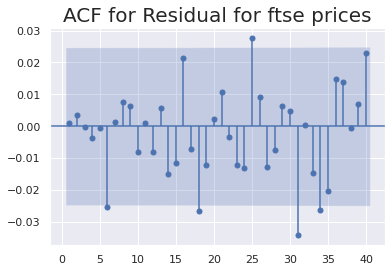

In [43]:
sgt.plot_acf(ds.res_price, zero =False, lags = 40)     
plt.title("ACF for Residual for ftse prices",size = 20)
plt.show()

In [ ]:
we see majority of residuals are not significantly diff from 0. 
thus as we expected residuals behave as white noise

also plot and see if residuals behave as white noise

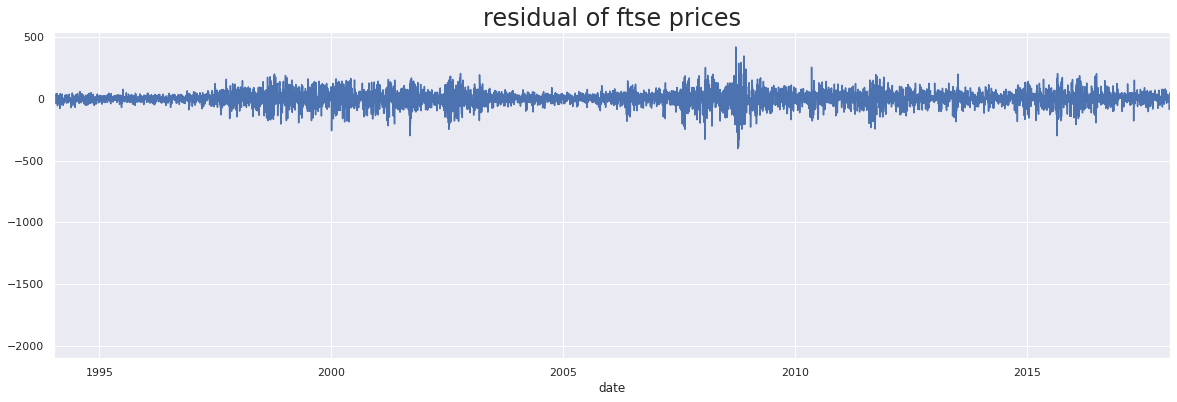

In [48]:
ds.res_price.plot(figsize = (20,6))              # looks like white noise
plt.title("residual of ftse prices", size= 24)
plt.show()

In [50]:
#Residual of return

In [53]:
ret_mod_6 = ARMA(ds.returns, order=(6,0))
ret_result_6 = ret_mod_6.fit()
print(ret_result_6.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52302D+00    |proj g|=  1.95111D-04

At iterate    5    f=  1.52302D+00    |proj g|=  6.66134D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6      8      1     0     0   4.441D-08   1.523D+00
  F =   1.5230185038656461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(6, 0)   Log Likelihood               -9558.464
Method:                       css-mle   S.D. of innovations              1.110
Date:                Thu, 30 Jun 2022   AIC                          19132.928
Time:                        12:08:37   BIC                          19186.884
Sample:                    01-10-1994   HQIC                         19151.623
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.643      0.100      -0.004       0.042
ar.L1.returns    -0.0200      0.013     -1.583      0.113      -0.045       0.005
ar.L2.returns    -0.0510      0.013     

In [55]:
ds['ret_res_price']= ret_result_6.resid       
ds.ret_res_price.mean()         


-4.0683030503646616e-05

In [56]:
ds.ret_res_price.var()

1.2316020722945435

In [58]:
sts.adfuller(ds.ret_res_price)    #stationary

(-14.994309221849345,
 1.11350338199967e-27,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 19028.245691339707)

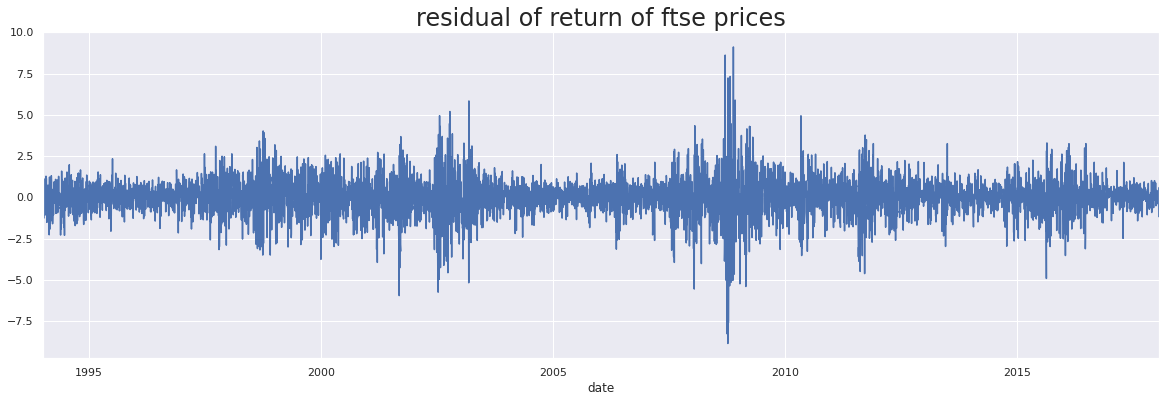

In [59]:
ds.ret_res_price.plot(figsize = (20,6))              # looks like white noise
plt.title("residual of return of ftse prices", size= 24)
plt.show()

In [ ]:
We see the error are usually small but around 2008(the great recession), errors(residuals)
are high. now how can we predict those unpredictive events in future

we predict those we use a self corrective model, Moving Average (MA) model
refer Time series Analysis 2